# Tree DataStructure

A tree is a non-linear data structure that is used to store data in a hierarchical manner. It is a collection of nodes connected by edges. Each node contains a value or data, and it may or may not have a child node. The topmost node is called the root node, and the nodes that do not have any child nodes are called leaf nodes.

## Major Components of a Tree:

- **Node**: Each element of a tree is called a node. It contains a value and a reference to its child nodes.

- **Root**: The topmost node of a tree is called the root node. It is the starting point of the tree.

- **Parent**: A node that has child nodes is called a parent node.

- **Child**: The nodes that are connected to a parent node are called child nodes.

- **Leaf**: A node that does not have any child nodes is called a leaf node.

- **Edge**: The connection between two nodes is called an edge.

- **Height**: The height of a tree is the length of the longest path from the root node to a leaf node.

- **Depth**: The depth of a node is the length of the path from the root node to that node.

- **Level**: The level of a node is the depth of the node + 1.

- **Subtree**: A subtree is a tree that is part of a larger tree.

## Types of Trees:

1. **Binary Tree**: A binary tree is a tree in which each node has at most two children, which are referred to as the left child and the right child.

2. **Binary Search Tree (BST)**: A binary search tree is a binary tree in which the left child of a node contains only nodes with values less than the node's value, and the right child of a node contains only nodes with values greater than the node's value.

3. **Balanced Tree**: A balanced tree is a tree in which the height of the left and right subtrees of any node differ by at most one (difference is minimal). E.g., AVL tree, Red-Black tree, etc.

4. **Complete Binary Tree**: A complete binary tree is a binary tree in which all levels are completely filled except possibly for the last level, which is filled from left to right.

5. **Full Binary Tree**: A full binary tree is a binary tree in which each node has either 0 or 2 children.

6. **Perfect Binary Tree**: A perfect binary tree is a binary tree in which all internal nodes have exactly two children and all leaf nodes are at the same level.

7. **Ternary Tree**: A ternary tree is a tree in which each node has at most three children.

8. **N-ary Tree**: An n-ary tree is a tree in which each node has at most n children.

9. **Trie (Prefix Tree)**: A trie is a tree-like data structure used to store a dynamic set of strings.

10. **Heap**: A heap is a complete binary tree that satisfies the heap property (e.g., min-heap or max-heap). It is used to implement priority queues.

13. **B-Tree**: A B-tree is a self-balancing tree data structure that maintains sorted data and allows searches, sequential access, insertions, and deletions in logarithmic time.


## Operations on Trees:

1. **Insertion**: Insert a new node into the tree.

2. **Deletion**: Remove a node from the tree.

3. **Traversal**: Visit all the nodes in the tree in a specific order.

    - **Inorder Traversal**: Traverse the left subtree, visit the root node, traverse the right subtree.

    - **Preorder Traversal**: Visit the root node, traverse the left subtree, traverse the right subtree.

    - **Postorder Traversal**: Traverse the left subtree, traverse the right subtree, visit the root node.

    - **Level-order Traversal**: Visit the nodes level by level from left to right.
   
4. **Searching**: Search for a specific value in the tree.

### 1. Binary Tree

A binary tree is a tree in which each node has at most two children, which are referred to as the left child and the right child.

#### Implementation

In [2]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def __repr__(self) -> str:
        return f"Node({self.value})"

In [55]:
# represent the tree using graphviz
%matplotlib inline
from graphviz import Digraph

def draw_tree(root):
    dot = Digraph(format='svg', node_attr={'shape': 'circle'})
    def draw_node(node):
        if node.left:
            dot.edge(str(node.value), str(node.left.value), label='L')
            draw_node(node.left)
        if node.right:
            dot.edge(str(node.value), str(node.right.value), label='R')
            draw_node(node.right)
    draw_node(root)
    display(dot)

#### Operations

`1. Insertion`

In [56]:
def insert_binary(root, data) -> Node:
    if root is None:
        return Node(data)
    if root.left is None:
        root.left = insert_binary(root.left, data)
    elif root.right is None:
        root.right = insert_binary(root.right, data)
    else:
        # Can choose one (right/left) sub tree to insert
        root.left = insert_binary(root.left, data)
    
    return root

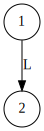

In [57]:
root = Node(1)
for i in range(2, 3):
    insert_binary(root, i)
draw_tree(root)

`2. Deletion`

In [9]:
def delete_binary(root, data):
    if root is None:
        return None

    if root.right is None and root.left is None:
        if root.value == data:
            return None
        else:
            return root
    
    current_node = None
    target_node = None
    queue = [root]

    while(len(queue)):
        print("queue:", queue)
        current_node = queue.pop(0)

        if current_node.value == data:
            target_node = current_node

        if current_node.left:
            queue.append(current_node.left)

        if current_node.right:
            queue.append(current_node.right)

    print("target_node: ", target_node)
    if target_node is not None:
        target_node.value = current_node.value
        print(current_node.value)
        # delete the deepest right most node -> current_node
        deepest_right_most(root, current_node)

    return root


def deepest_right_most(root, target_node):
    queue = [root]

    while(len(queue)):
        tmp = queue.pop(0)

        if tmp is target_node:
            tmp = None
            return
        
        if tmp.left:
            if tmp.left is target_node:
                tmp.left = None
                return
            else:
                queue.append(tmp.left)
        
        if tmp.right:
            if tmp.right is target_node:
                tmp.right = None
                return
            else:
                queue.append(tmp.right)

queue: [Node(1)]
queue: [Node(2), Node(3)]
queue: [Node(3), Node(4), Node(5)]
queue: [Node(4), Node(5)]
queue: [Node(5), Node(6), Node(7)]
queue: [Node(6), Node(7)]
queue: [Node(7)]
target_node:  Node(1)
7


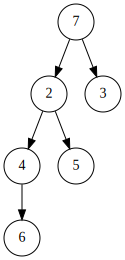

In [10]:
root = delete_binary(root, 1)
draw_tree(root)

`3. Traversal`

- Inorder Traversal

    In this traversal, the nodes are recursively visited in this order: left, root, right.

In [151]:
def inorder_binary(root):
    if root is None:
        return root
    
    inorder_binary(root.left)
    print(f"{root.value}", end="-")
    inorder_binary(root.right)

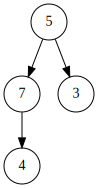

4-7-5-3-

In [73]:
draw_tree(root)
inorder_binary(root)

- Preorder Traversal

    In this traversal, the nodes are recursively visited in this order: root, left, right.

In [74]:
def preorder_binary(root):
    if root is None:
        return root
    
    print(f"{root.value}", end="-")
    preorder_binary(root.left)
    preorder_binary(root.right)

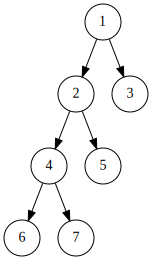

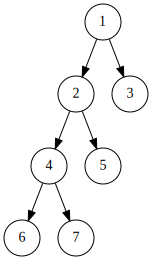

1-2-4-6-7-5-3-

In [76]:
root = Node(1)
for i in range(2, 8):
    insert_binary(root, i)
draw_tree(root)

draw_tree(root)
preorder_binary(root)

- Postorder Traversal

    In this traversal, the nodes are recursively visited in this order: left, right, root.

In [80]:
def postorder_binary(root):
    if root is None:
        return root
    postorder_binary(root.left)
    postorder_binary(root.right)
    print(f"{root.value}", end="-")

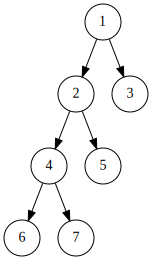

6-7-4-5-2-3-1-

In [81]:
draw_tree(root)
postorder_binary(root)

- Level-order Traversal

    In this traversal, the nodes are visited level by level from left to right.

In [84]:
def levelorder_binary(root):
    if root is None:
        return
    
    queue = [root]

    while(len(queue)):
        current = queue.pop(0)
        print(f"{current.value}", end="-")
        if current.left:
            queue.append(current.left)
        if current.right:
            queue.append(current.right)

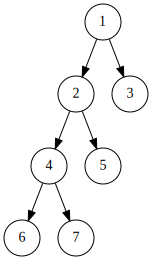

1-2-3-4-5-6-7-

In [85]:
draw_tree(root)
levelorder_binary(root)

`4. Searching`

Searching for a specific value in the tree. To search for a value in a binary tree, we can use the depth-first search (DFS) algorithm, such as inorder, preorder, or postorder traversal to visit all the nodes in the tree or the breadth-first search (BFS) algorithm, such as level-order traversal to visit the nodes level by level.

Let's implement search using the level-order traversal algorithm.

In [154]:
def search_binary(root, data):
    if root is None:
        return None
    
    queue = [root]
    found = False
    while(len(queue)):
        tmp = queue.pop(0)
        if tmp.value == data:
            found = True
            break

        if tmp.left:
            queue.append(tmp.left)
        if tmp.right:
            queue.append(tmp.right)

    return found

In [90]:
target = 7
print(f"{'Found' if search_binary(root, target) else 'Not found'} {target} in the tree.")

Found 7 in the tree.


### 2. Binary Search Tree (BST)

A binary search tree is a binary tree in which the left child of a node contains only nodes with values less than the node's value, and the right child of a node contains only nodes with values greater than the node's value.

#### Implementation

We can resuse same `Node` class and `BinaryTree` class to implement Binary Search Tree.

#### Operations

`1. Insertion`

In [102]:
def insert_bst(root, data):
    if root is None:
        return Node(data)

    if data < root.value:
        root.left = insert_bst(root.left, data)
    elif data > root.value:
        root.right = insert_bst(root.right, data)

    return root

96 48 22 71 31 

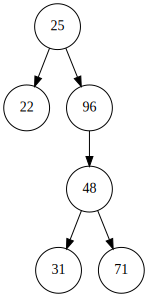

In [165]:
import random
root = Node(25)
for i in range(5):
    data = random.randint(1, 100)
    print(data, end=" ")
    insert_bst(root, data)

draw_tree(root)

`2. Deletion`

In [169]:
def delete_bst(root, data):
    if root is None:
        return None
    
    if root.left is None and root.right is None:
        if root.value == data:
            return None
        else:
            return root
        
    if data < root.value:
        root.left = delete_bst(root.left, data)
    elif data > root.value:
        root.right = delete_bst(root.right, data)
    else:
        if root.left is None:
            return root.right
        elif root.right is None:
            return root.left
        
        # In case of Node having 2 childs, find Inorder successor (smallest in right subtree)
        successor = find_successor(root.right)
        root.value = successor.value

        root.right = delete_bst(root.right, successor.value)

    return root

def find_successor(root) -> Node:
    if root.left is None:
        return root
    
    if root.left:
        return find_successor(root.left)


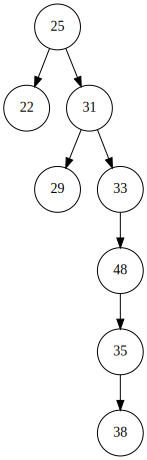

In [172]:
root = Node(25)
for i in range(8):
    data = random.randint(1,50)
    insert_bst(root, data)
draw_tree(root)

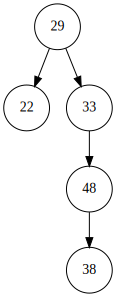

In [175]:
root = delete_bst(root, 35)
draw_tree(root)

`3. Traversal`

- Inorder Traversal

    In this traversal, the nodes are recursively visited in this order: left, root, right.

In [176]:
inorder_binary(root)

22-29-33-38-48-

- Preorder Traversal

    In this traversal, the nodes are recursively visited in this order: root, left, right.

In [177]:
preorder_binary(root)

29-22-33-48-38-

- Postorder Traversal

    In this traversal, the nodes are recursively visited in this order: left, right, root.

In [178]:
postorder_binary(root)

22-38-48-33-29-

- Level-order Traversal

    In this traversal, the nodes are visited level by level from left to right.

In [179]:
levelorder_binary(root)

29-22-33-48-38-

`4. Searching`

Searching for a specific value in the tree. To search for a value in a binary search tree, we can use the binary search algorithm to compare the value with the root node and recursively search in the left or right subtree based on the comparison.

In [182]:
def search_bst(root, data):
    if root is None or root.value == data:
        return root
    
    if data < root.value:
        return search_bst(root.left, data)
    
    return search_bst(root.right, data)

In [184]:
search_bst(root, 29)

Node(29)

### 3. Balanced Tree

A balanced tree is a tree in which the height of the left and right subtrees of any node differ by at most one (difference is minimal). E.g., AVL tree, Red-Black tree, etc.

#### AVL Tree

An AVL tree is a self-balancing binary search tree in which the heights of the two child subtrees of any node differ by at most one.

#### Red-Black Tree

A red-black tree is a self-balancing binary search tree in which each node has an extra bit for denoting the color of the node.

### 3.1 AVL Tree

#### Implementation

In [149]:
class AVLNode(Node):
    def __init__(self, value):
        super().__init__(value)
        self.height = 1

    def __repr__(self) -> str:
        return f"AVLNode({self.value})"

In [5]:
def get_height(node):
    if node is None:
        return 0
    
    return node.height

def update_height(node):
    node.height = max(get_height(node.left), get_height(node.right)) + 1

def get_balance_factor(node):
    if node is None:
        return 0
    
    return get_height(node.left) - get_height(node.right)

In [129]:
def left_rotate(node):
    print("L Rotation...")
    target = node.right
    tmp = target.left

    target.left = node
    node.right = tmp

    update_height(node)
    update_height(target)

    return target

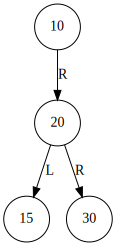

In [95]:
root = AVLNode(10)
root.right = AVLNode(20)
root.right.left = AVLNode(15)
root.right.right = AVLNode(30)
draw_tree(root)

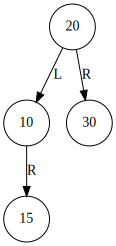

In [94]:
root = left_rotate(root)
draw_tree(root)

In [130]:
def right_rotate(node):
    print("R Rotation...")
    target = node.left
    tmp = target.right

    target.right = node
    node.left = tmp

    update_height(node)
    update_height(target)
    
    return target

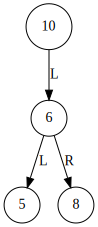

In [86]:
root = AVLNode(10)
root.left = AVLNode(6)
root.left.left = AVLNode(5)
root.left.right = AVLNode(8)
draw_tree(root)

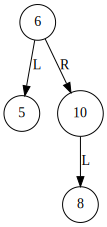

In [87]:
root = right_rotate(root)
draw_tree(root)

In [131]:

def lr_rotate(root):
    print("LR Rotation...")
    root.left = left_rotate(root.left)
    root = right_rotate(root)
    return root

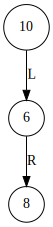

In [132]:
root = AVLNode(10)
root.left = AVLNode(6)
root.left.right = AVLNode(8)
draw_tree(root)

LR Rotation...
L Rotation...
R Rotation...


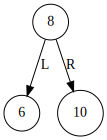

In [133]:
root = lr_rotate(root)
draw_tree(root)

In [134]:
def rl_rotate(root):
    print("RL Rotation...")
    root.right = right_rotate(root.right)
    root = left_rotate(root)
    return root

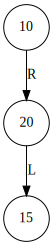

In [135]:
root = AVLNode(10)
root.right = AVLNode(20)
root.right.left = AVLNode(15)
draw_tree(root)

RL Rotation...
R Rotation...
L Rotation...


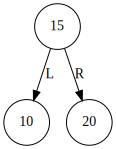

In [136]:
root = rl_rotate(root)
draw_tree(root)

#### Operations

`1. Insertion`

In [137]:
def insert_avl(root, data):
    if  root is None:
        return AVLNode(data)
    
    if data < root.value:
        root.left = insert_avl(root.left, data)
    elif data > root.value:
        root.right = insert_avl(root.right, data)
    else:
        return root
    
    update_height(root)

    bf = get_balance_factor(root)
    
    # LL Case
    if bf > 1 and data < root.left.value:
        root = right_rotate(root)

    # RR Case
    if bf < -1 and data > root.right.value:
        root = left_rotate(root)

    # LR Case
    if bf > 1 and data > root.left.value:
        root = lr_rotate(root)

    # RL Case
    if bf < -1 and data < root.right.value:
        root = rl_rotate(root)

    return root

L Rotation...


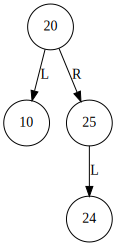

In [138]:
root = AVLNode(10)
root = insert_avl(root, 20)
root = insert_avl(root, 25)
root = insert_avl(root, 24)
# root = insert_avl(root, 23)
draw_tree(root)

R Rotation...


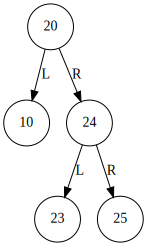

In [139]:
root = insert_avl(root, 23)
draw_tree(root)

`2. Deletion`

In [146]:
def delete_avl(root, data):
    if root is None:
        return root
    
    if root.left is None and root.right is None:
        return None

    if data < root.value:
        root.left = delete_avl(root.left, data)
    elif data > root.value:
        root.right = delete_avl(root.right, data)
    else:
        if root.left is None:
            return root.right
        elif root.right is None:
            return root.left
        
        successsor = find_successor(root.right)
        root.value = successsor.value
        root.right = delete_avl(root.right, successsor.value)

    update_height(root)

    # Balance factore
    bf = get_balance_factor(root)

    # LL Case
    if bf > 1 and get_balance_factor(root.left) >= 0:
        root = right_rotate(root)


    # LR Case
    if bf > 1 and get_balance_factor(root.left) < 0:
        root  = lr_rotate(root)

    # RR Case
    if bf < -1 and get_balance_factor(root.right) <= 0:
        root = left_rotate(root)

    # RL Case
    if bf < -1 and get_balance_factor(root.right) > 0:
        root = rl_rotate(root)
    
    return root

L Rotation...
R Rotation...


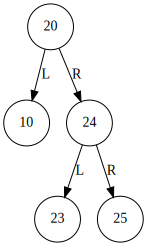

In [147]:
root = AVLNode(10)
root = insert_avl(root, 20)
root = insert_avl(root, 25)
root = insert_avl(root, 24)
root = insert_avl(root, 23)
draw_tree(root)

L Rotation...


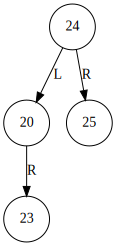

In [148]:
root = delete_avl(root, 10)
draw_tree(root)

`3. Traversal`

Traversal operations are similar to binary tree traversal.

L Rotation...
R Rotation...


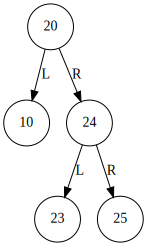

10-20-23-24-25-

In [152]:
root = AVLNode(10)
root = insert_avl(root, 20)
root = insert_avl(root, 25)
root = insert_avl(root, 24)
root = insert_avl(root, 23)
draw_tree(root)

inorder_binary(root)

`4. Searching`

Searching is similar to binary search tree.

In [155]:
search_binary(root, 10), search_binary(root, 11)

(True, False)

### 3.2 Red-Black Tree

#### Implementation

In [249]:
class RBNode(Node):
    def __init__(self, value):
        super().__init__(value)
        self.color = "Red"
        self.parent = None

    def __repr__(self) -> str:
        return f"RBNode({self.value, self.color, self.parent})"

In [250]:
# represent the tree using graphviz
%matplotlib inline
from graphviz import Digraph

def draw_rb_tree(root):
    dot = Digraph(format='svg', node_attr={'shape': 'circle'})
    def draw_node(node):
        dot.node(str(node.value), fillcolor= node.color, style= 'filled', fontcolor='White')
        if node.left:
            dot.edge(str(node.value), str(node.left.value), label='L')
            draw_node(node.left)
        if node.right:
            dot.edge(str(node.value), str(node.right.value), label='R')
            draw_node(node.right)
    draw_node(root)
    display(dot)

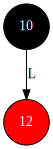

In [251]:
root = RBNode(10)
root.color = 'Black'
root.left = RBNode(12)
draw_rb_tree(root)

#### Operations

`1. Insertion`

In [385]:
class RBTree():
    def __init__(self) -> None:
        self.root = None

    def insert_rb(self, data):
        new_node = RBNode(data)

        current = self.root
        parent = None
        while current:
            parent = current
            if data < current.value:
                current = current.left
            elif data > current.value:
                current = current.right

        new_node.parent = parent
        # print(f"Parent: {parent}, Current: {current}")
        if parent is None:
            self.root = new_node
        elif data < parent.value:
                parent.left = new_node
        elif data > parent.value:
            parent.right = new_node

        self.fix_violations(new_node)
        

    def fix_violations(self, node):
        print(node)
        while node.parent and (node.parent.color).lower() == "red":
            print(f"Fixing violations on {node}...")
            if node.parent == node.parent.parent.left: # Uncle Right
                uncle = node.parent.parent.right
                if uncle and (uncle.color).lower() == "red": # Uncle Red
                    uncle.color = "Black"
                    node.parent.color = "Black"
                    node.parent.parent.color = "Red"
                    node = node.parent.parent
                else: # Uncle Black
                    if node == node.parent.right: # Node is right
                        node = node.parent
                        self.left_rotate_rb(node)
                    
                    node.parent.color = "Black"
                    node.parent.parent.color = "Red"
                    self.right_rotate_rb(node.parent.parent)

            else: # Uncle Left
                uncle = node.parent.parent.left
                if uncle and (uncle.color).lower() == "red": # Uncle Red
                    node.parent.color = "Black"
                    uncle.color = "Black"
                    node.parent.parent.color = "Red"
                    node = node.parent.parent
                else: # UNcle Black
                    if node == node.parent.left: # Node if left
                        node = node.parent
                        self.right_rotate_rb(node)
                    node.parent.color = "Black"
                    node.parent.parent.color = "Red"
                    self.left_rotate_rb(node.parent.parent)

        self.root.color = "Black"
                
    def left_rotate_rb(self, node):
        print("L Rotation...")
        target = node.right
        node.right = target.left

        if target.left:
            target.left.parent = node
        target.parent = node.parent

        if node.parent is None:
            self.root = target
        elif node == node.parent.left:
            node.parent.left = target
        else:
            node.parent.right = target

        target.left = node
        node.parent = target


    def right_rotate_rb(self, node):
        print("R Rotation...")
        target = node.left
        node.left = target.right

        if target.right:
            target.right.parent = node
        target.parent = node.parent
        
        if node.parent is None:
            self.root = target
        elif node == node.parent.left:
            node.parent.left = target
        else:
            node.parent.right = target

        target.right = node
        node.parent = target

    def delete_rb(self, data):
        
        target = self.root
        while target and target.value != data:
            if data > target.value:
                target = target.right
            else:
                target = target.left
        
        if not target:
            print(f"There is no node with data {data} in the tree.")
            return None
        
        target_color = target.color
        print(f"Target: {target}")
        if target.left is None and target.right is None:
            target = None
        elif target.left is None:
            target = target.right
        elif target.right is None:
            target = target.left
        else:
            successor = find_successor(target.right)
            target.value = successor.value

        def find_successor(node):
            while node.left:
                node = node.left
            
            return node



RBNode((10, 'Red', None))


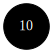

RBNode((12, 'Red', RBNode((10, 'Black', None))))


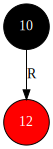

RBNode((13, 'Red', RBNode((12, 'Red', RBNode((10, 'Black', None))))))
Fixing violations on RBNode((13, 'Red', RBNode((12, 'Red', RBNode((10, 'Black', None))))))...
L Rotation...


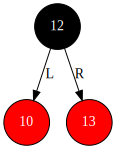

RBNode((14, 'Red', RBNode((13, 'Red', RBNode((12, 'Black', None))))))
Fixing violations on RBNode((14, 'Red', RBNode((13, 'Red', RBNode((12, 'Black', None))))))...


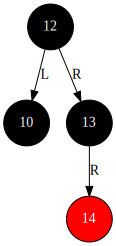

RBNode((15, 'Red', RBNode((14, 'Red', RBNode((13, 'Black', RBNode((12, 'Black', None))))))))
Fixing violations on RBNode((15, 'Red', RBNode((14, 'Red', RBNode((13, 'Black', RBNode((12, 'Black', None))))))))...
L Rotation...


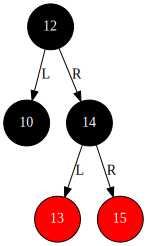

RBNode((5, 'Red', RBNode((10, 'Black', RBNode((12, 'Black', None))))))


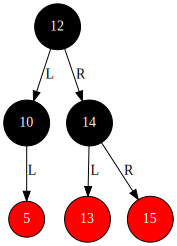

RBNode((6, 'Red', RBNode((5, 'Red', RBNode((10, 'Black', RBNode((12, 'Black', None))))))))
Fixing violations on RBNode((6, 'Red', RBNode((5, 'Red', RBNode((10, 'Black', RBNode((12, 'Black', None))))))))...
L Rotation...
R Rotation...


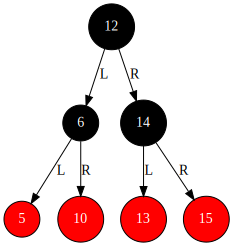

Target: RBNode((10, 'Red', RBNode((6, 'Black', RBNode((12, 'Black', None))))))


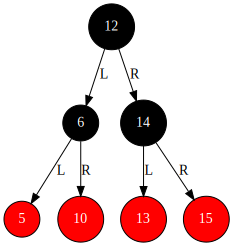

In [386]:
tree = RBTree()
root.color = "Black"
tree.insert_rb(10)
draw_rb_tree(tree.root)
tree.insert_rb(12)
draw_rb_tree(tree.root)
tree.insert_rb(13)
draw_rb_tree(tree.root)
tree.insert_rb(14)
draw_rb_tree(tree.root)
tree.insert_rb(15)
draw_rb_tree(tree.root)
tree.insert_rb(5)
draw_rb_tree(tree.root)
tree.insert_rb(6)
draw_rb_tree(tree.root)
tree.delete_rb(10)
draw_rb_tree(tree.root)